In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
with open("res/logs/model_performance.pickle", "rb") as LOG_FILE:
    df = pickle.load(LOG_FILE)
print(df)

                         name                        num_hidden       dataset  \
0                     [16, 4]                {'num_hidden': []}     Condensed   
0                 [16, 10, 4]              {'num_hidden': [10]}     Condensed   
0                 [16, 20, 4]              {'num_hidden': [20]}     Condensed   
0                 [16, 40, 4]              {'num_hidden': [40]}     Condensed   
0             [16, 10, 10, 4]          {'num_hidden': [10, 10]}     Condensed   
0             [16, 20, 20, 4]          {'num_hidden': [20, 20]}     Condensed   
0             [16, 40, 40, 4]          {'num_hidden': [40, 40]}     Condensed   
0         [16, 40, 40, 40, 4]      {'num_hidden': [40, 40, 40]}     Condensed   
0     [16, 40, 40, 40, 40, 4]  {'num_hidden': [40, 40, 40, 40]}     Condensed   
0                  [24000, 4]                {'num_hidden': []}  Concatenated   
0              [24000, 10, 4]              {'num_hidden': [10]}  Concatenated   
0              [24000, 20, 4

<AxesSubplot:xlabel='num_weights', ylabel='batch_time'>

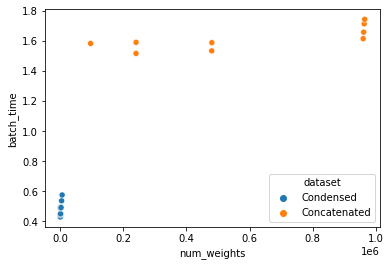

In [3]:
sns.scatterplot(data = df, x="num_weights", y="batch_time", hue="dataset")

In [4]:
int(df[(df.dataset == "Condensed") & (df.name == "[16, 4]")]["num_weights"])

68

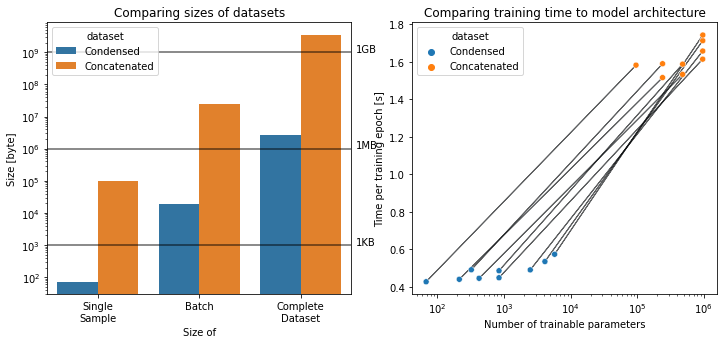

In [5]:
archs = df[df.dataset == "Condensed"].num_hidden

fig = plt.figure(figsize = (12,5))
plt.subplot(1,2,2)

for ach in archs:
    start = df[(df.dataset == "Condensed") & (df.num_hidden == ach)]
    stop = df[(df.dataset == "Concatenated") & (df.num_hidden == ach)]
    
    plt.arrow(x=int(start["num_weights"]), y = float(start["batch_time"]),
                dx = int(stop["num_weights"]) - int(start["num_weights"]), dy = float(stop["batch_time"]) - float(start["batch_time"]),
                alpha = 0.6)

sns.scatterplot(data = df, x="num_weights", y="batch_time", hue="dataset")

plt.xlabel("Number of trainable parameters")
plt.ylabel("Time per training epoch [s]")
plt.title("Comparing training time to model architecture")

plt.xscale("log")



cod = 16*32/8 + 64/8 
cnc = 8*3000*32/8 + 64/8

plt.subplot(1,2,1)
df_sizes = pd.DataFrame({
    "dataset" : ["Condensed", "Condensed", "Condensed"],
    "size": [cod , cod * 256, cod * 36544],
    "size of" : ["Single\nSample", "Batch", "Complete\nDataset"]
})

df_sizes = pd.concat([df_sizes, 
    pd.DataFrame({
    "dataset" : ["Concatenated", "Concatenated", "Concatenated"],
    "size": [cnc, cnc*256, cnc*36544],
    "size of" : ["Single\nSample", "Batch", "Complete\nDataset"]
    })
])

sns.barplot(data = df_sizes, x="size of", y="size", hue="dataset")
plt.axhline(1e3, 0, 3, color="black", alpha = 0.6)
plt.axhline(1e6, 0, 3, color="black", alpha = 0.6)
plt.axhline(1e9, 0, 3, color="black", alpha = 0.6)
# plt.text(-0.4, 1.2e9, "1GB")
# plt.text(-0.4, 1.2e6, "1MB")
# plt.text(-0.4, 1.2e3, "1KB")
plt.text(2.54, 1e9, "1GB")
plt.text(2.54, 1e6, "1MB")
plt.text(2.54, 1e3, "1KB")
plt.yscale("log")

plt.xlabel("Size of")
plt.ylabel("Size [byte]")
plt.title("Comparing sizes of datasets")
plt.savefig("res/compare_cond_conc.png")
plt.savefig("res/compare_cond_conc.pdf")
plt.show()